In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Generation

We want to generate data for classification with 2 classes.
- We need pairs of data x and label y. We assume two classes: $y \in \{ 0, 1\}$. We assume the data being 2-dim: $x \in \mathbb{R}^d, \; d = 2$

The coarse
idea of how to generate data is for this exercise is: we will draw
data from **2 gaussian blobs**. Depending on whether the data is
from blob 1 or blob 2, the probability of having a label $y = 0$
will be different.

### Drawing Algorithm

Repeat for $n$ data pairs $(x, y)$
- draw a random value for the membership variable $C \in\{1,2\} $ where $P(C=1)=0.5$
- draw $x$ from a gaussian with index being equal to the value of C. If $C=2,$ then draw from gaussian with index $2 .$

#### Generate x: Draw from Gaussian
draw the random vector $u=\left(u^{(1)}, u^{(2)}\right),$ where each component $u^{(d)}$ is drawn from a univariate normal distribution with
zero mean and variance one.

- If $C=1,$ then do the transformation:
$$x=A \cdot u+\mu_{1}$$
- If $C=2,$ then do the transformation:
$$x=A \cdot u+\mu_{2}$$
where $A, \mu_{i}$ are defined as:
$$
A=\left( \begin{array}{cc}{\cos (\pi / 4)} & {+\sin (\pi / 4)} \\ {-\sin (\pi / 4)} & {\cos (\pi / 4)}\end{array}\right) \left( \begin{array}{ll}{3} & {0} \\ {0} & {1}\end{array}\right)
$$
and $$
\begin{aligned} \mu_{1} &=(0,0) \\ \mu_{2} &=(2.5,0) \end{aligned}
$$

#### Generate Y
using the value of C, draw y according to
- $p ( y = \; 0 | \; x, c ( x ) = 1 ) = 0.3$
- $p ( y = 0 \; | \; x, c ( x ) = 2 ) = 0.6$

In [2]:
# constants
A = np.zeros((2,2))
A[0][0] = np.cos(np.pi/4)
A[0][1] = np.sin(np.pi/4)
A[1][0] = -np.sin(np.pi/4)
A[1][1] = np.cos(np.pi/4)
B=np.zeros((2,2))
B[0][0] = 3.
B[1][1] = 1.

A=np.dot(A,B)

mu1 = np.array([0,0])
mu2 = np.array([2.5, 0])

def gen_c():
    # Generate C, uniform distribution (p=0.5)
    return np.random.choice([1,2])

def gen_xy(C):
    # loc: mean, scale: std
    u = np.random.normal(loc=0, scale=1, size=2) 
    Au = A@u
    if C==1:
        x = Au + mu1
        y = np.random.choice([0,1], p=[0.3, 0.7]) 
    else:
        x = Au + mu2
        y = np.random.choice([0,1], p=[0.6, 0.4])
    return x,y

In [9]:
def generate_data(n=1000):
    xs = np.zeros((n, 2))
    ys =  np.zeros(n)
    c =  np.zeros(n)
    for i in range(n):
        C = gen_c()
        x,y = gen_xy(C)
        xs[i] = x
        ys[i] = y
        c[i] = C
    return xs, ys, c

In [12]:
xs, ys, membership = generate_data()

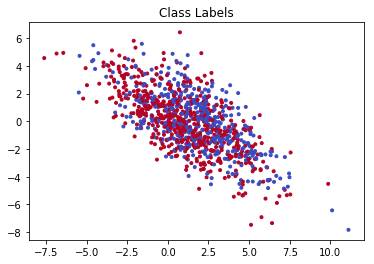

In [13]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys, marker=".", cmap='coolwarm')
plt.title("Class Labels")
plt.show()

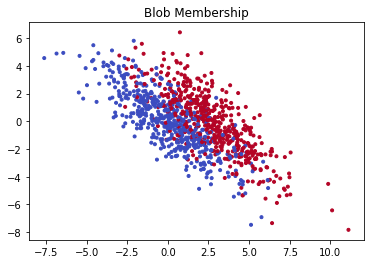

In [15]:
plt.scatter(xs[:, 0], xs[:, 1], c=membership, marker=".", cmap='coolwarm')
plt.title("Blob Membership")
plt.show()

## Classifier
Implement a good and a bad classifier.

- draw a dataset $D_n$ with $n = 500$
- Implement a nearest neigbor classifier which is fitted by the
data $D_{n} .$ 

### Nearest Neighbour Classifier
It works as follows. Suppose we have to label a sample $x .$ The label of $\hat{x}$ will be defined as the label $y_{*}$ of the sample
$\left(x_{*}, y_{*}\right) \in D_{n}$ which has nearest euclidean distance between $x$
and $x_{*}$ among all samples $(x, y) \in D_{n}$ . formally
$$
f(\hat{x})=y_{*} \text { such that }\left(x_{*}, y_{*}\right)=\operatorname{argmin}_{(x, y) \in D_{n}}\|x-\hat{x}\|
$$

In [22]:
xs_train, ys_train, _ = generate_data(500)
xs, ys, _ = generate_data(1000)

In [41]:
def knn_one(xs, xs_train, ys_train, same=False):
    N = len(xs)
    ys_predict = np.zeros(N)
    for i in range(N):

        min_distance = np.inf
        min_index = None
        for j in range(len(xs_train)):
            
            # if the same point, dont consider
            if same and np.array_equal(xs[i],xs_train[j]):
                continue
                
            distance = np.linalg.norm(xs[i] - xs_train[j])
            if distance < min_distance:
                min_distance = distance
                min_index = j
        ys_predict[i] = ys_train[min_index]
        
    return ys_predict

In [42]:
ys_predict = knn_one(xs, xs_train, ys_train)
accuracy = np.mean(ys == ys_predict)
print(accuracy)

0.534


In [43]:
ys_predict = knn_one(xs, xs, ys, True)
accuracy = np.mean(ys == ys_predict)
print(accuracy)

0.531


In [53]:
def new_classifier(x):
    z = [1,1]@x-1.25
    return 1 if z < 1 else 0

xs, ys, _ = generate_data(20000)

N = len(xs)
ys_predict = np.zeros(N)
for i in range(N):
    ys_predict[i] = new_classifier(xs[i])
    
accuracy = np.mean(ys == ys_predict)
accuracy

0.5967